In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')

/Users/ashishbazad/git/portfolio-optimisation-markowitz/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 10000*5

# stocks_list = ['GHCL.NS','HDFCBANK.NS','TATAMOTORS.NS','NH.NS','EMAMILTD.NS']
# stocks_list = ['CANBK.NS','NHPC.NS','TATASTEEL.NS','WIPRO.NS']
stocks_list = ['YESBANK.NS','GRASIM.NS','JSWENERGY.NS','CIPLA.NS','TCS.NS','EMAMILTD.NS']
start_date = "2021-04-04"
end_date = "2024-04-04"

In [3]:
# GATHERING STOCK DATA

stock_data = {}

for stock in stocks_list:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date, )['Close']
    
stock_prices = pd.DataFrame(stock_data)

stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-04-05 00:00:00+05:30,15.500000,1424.648804,84.553635,804.783752,3028.469482,473.761536
2021-04-06 00:00:00+05:30,15.600000,1410.909546,83.674393,820.884460,3052.593506,480.890076
2021-04-07 00:00:00+05:30,15.600000,1415.686279,87.337898,825.498535,3058.858154,482.173157
2021-04-08 00:00:00+05:30,15.550000,1425.929199,86.605194,826.627625,3101.822754,490.822449
2021-04-09 00:00:00+05:30,15.450000,1418.246948,98.133011,866.928162,3106.404297,491.202637
...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,23.150000,2207.350098,516.650024,1463.349976,3813.185059,437.750000
2024-03-28 00:00:00+05:30,23.200001,2287.300049,528.900024,1496.949951,3848.329590,429.350006
2024-04-01 00:00:00+05:30,24.450001,2292.550049,518.450012,1498.650024,3888.487793,439.850006


In [4]:
# CALCULATING LOGARITHMIC RETURNS

NUM_TRADING_DAYS = 251*3

returns_df = stock_prices.copy().reset_index().drop(columns=['Date'])
a = np.array(returns_df).T
log_returns = pd.DataFrame(np.log((a[:,1:] / a[:,:-1]).T), columns=stock_prices.columns, index=stock_prices.index[1:])
log_returns

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-04-06 00:00:00+05:30,0.006431,-0.009691,-0.010453,0.019809,0.007934,0.014935
2021-04-07 00:00:00+05:30,0.000000,0.003380,0.042851,0.005605,0.002050,0.002665
2021-04-08 00:00:00+05:30,-0.003210,0.007209,-0.008425,0.001367,0.013948,0.017779
2021-04-09 00:00:00+05:30,-0.006452,-0.005402,0.124964,0.047602,0.001476,0.000774
2021-04-12 00:00:00+05:30,-0.066915,-0.045026,-0.078136,0.021676,-0.023049,-0.021317
...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,-0.017131,-0.014705,0.006700,-0.006064,-0.009484,0.005727
2024-03-28 00:00:00+05:30,0.002158,0.035579,0.023434,0.022701,0.009174,-0.019376
2024-04-01 00:00:00+05:30,0.052478,0.002293,-0.019956,0.001135,0.010381,0.024161


In [5]:
# CALCULATING AVERAGE ANNUAL RETURNS

log_returns.mean()*NUM_TRADING_DAYS

YESBANK.NS      0.501908
GRASIM.NS       0.489146
JSWENERGY.NS    1.959189
CIPLA.NS        0.613237
TCS.NS          0.261906
EMAMILTD.NS    -0.079060
dtype: float64

In [6]:
# CALCULATING ANNUAL VOLATILITY

log_returns.std()/np.sqrt(NUM_TRADING_DAYS)

YESBANK.NS      0.000968
GRASIM.NS       0.000553
JSWENERGY.NS    0.001085
CIPLA.NS        0.000532
TCS.NS          0.000476
EMAMILTD.NS     0.000636
dtype: float64

In [7]:
# GENRATING RANDOM WEIGHTS AND CALCULATING THE RETURN & THE RISKS ASSOCIATED WITH THEM

portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

for i in range(NUM_SIMULATIONS):
    
    # generating random weights
    w = np.random.rand(log_returns.shape[1])
    w /= np.sum(w)
    portfolio_weights.append(w)
    
    # calculating returns
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    
    # calculating risks
    port_risks = np.sqrt(np.dot(w.T, np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risks)

In [8]:
# taking IR of government issued 10-year bonds as risk-free rate
risk_free_rate = 0.07

In [9]:
# CREATING DATAFRAME FOR WEIGHTS, RETURNS, RISKS, SHARPE

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

portfolios = pd.DataFrame({"Return":portfolio_returns, "Risk":portfolio_risks, "Sharpe":sharpe_ratios})

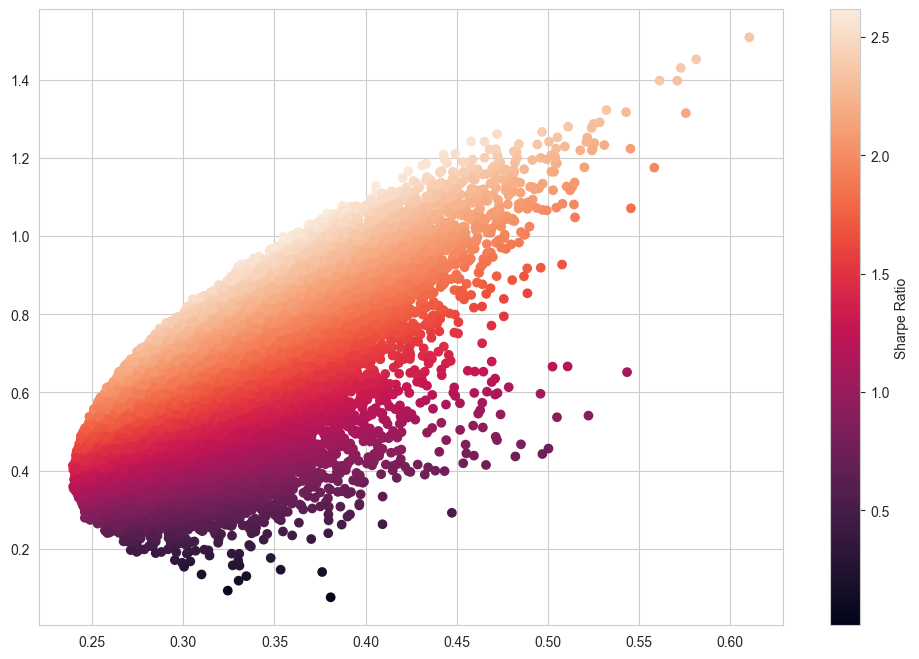

In [10]:
# PLOTTING RISK VS RETURN SCATTERPLOT


plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c = sharpe_ratios, marker='o')
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("expected Return")
plt.colorbar(label="Sharpe Ratio")

plt.show()

In [11]:
# FINDING OUT THE MAXIMUM SHARPE RATIO

ind = np.argmax(sharpe_ratios)

print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  2.6172652820925544
Corresponding Return =   0.9983614768481844
Corresponding Risk =   0.3547066792197471


In [12]:
# CORRESPONDING WEIGHTS FOR OUR PORTFOLIO WITH MAX SHARPE

for i in range(len(stocks_list)):
    print(stocks_list[i] ," : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.03153462289178869
GRASIM.NS  :  0.13337458089154197
JSWENERGY.NS  :  0.33421932096870594
CIPLA.NS  :  0.3791972461604651
TCS.NS  :  0.11607450737154922
EMAMILTD.NS  :  0.0055997217159492385


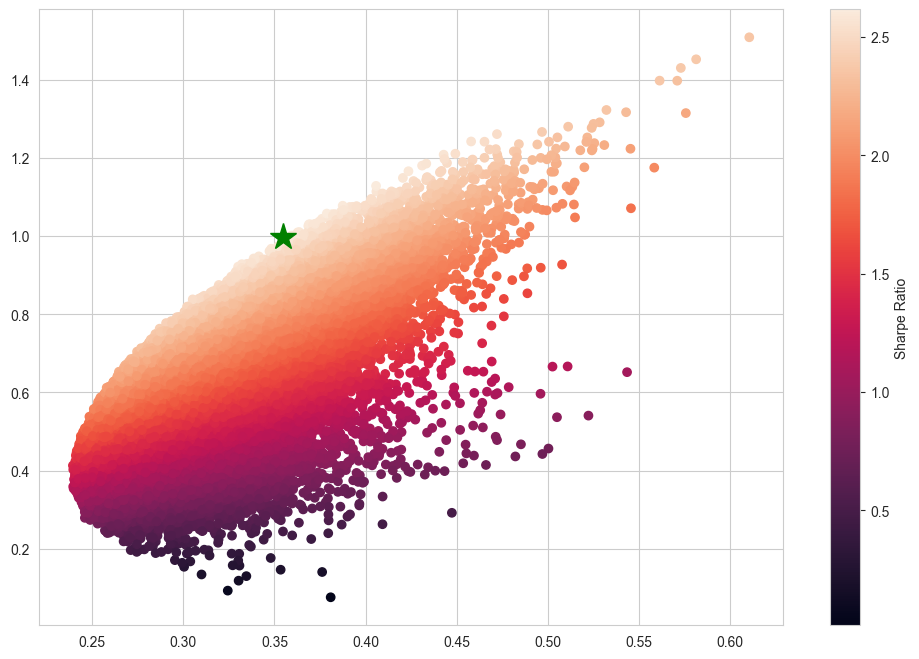

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c = sharpe_ratios, marker='o')
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label='Sharpe Ratio')

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize=20.0)

In [14]:
# FINDING OUT THE MINIMUM SHARPE RATIO

ind = np.argmin(sharpe_ratios)

print("Minimum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Minimum Sharpe Ratio =  0.014790516356475296
Corresponding Return =   0.07563261533333962
Corresponding Risk =   0.3808261454559463


In [15]:
# CORRESPONDING WEIGHTS FOR OUR PORTFOLIO WITH MIN SHARPE

for i in range(len(stocks_list)):
    print(stocks_list[i] ," : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.023845115289316623
GRASIM.NS  :  0.08264035651575673
JSWENERGY.NS  :  0.005163979378214315
CIPLA.NS  :  0.10941092217851331
TCS.NS  :  0.02232685473963748
EMAMILTD.NS  :  0.7566127718985616


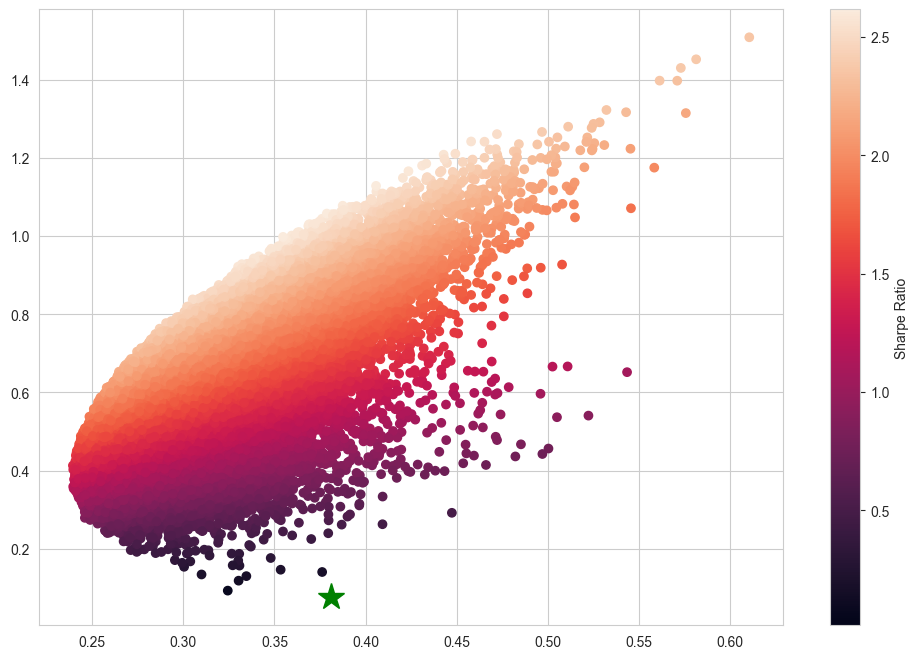

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c = sharpe_ratios, marker='o')
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label='Sharpe Ratio')

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize=20.0)

In [17]:
portfolio_weights.shape

(50000, 6)

In [18]:
stock_prices.shape

(742, 6)

In [19]:
ind = np.argmax(sharpe_ratios)
initial_investment = 10000
first_day_prices = np.array(stock_prices.iloc[0,:])
weights = portfolio_weights[ind]
individual_value_invested = weights*initial_investment

shares = individual_value_invested / first_day_prices

for i in range(shares.shape[0]):
    print("{}- values invested: {}, shares bought: {}".format(stocks_list[i],round(individual_value_invested[i],2),round(shares[i],2)))
          

YESBANK.NS- values invested: 315.35, shares bought: 20.34
GRASIM.NS- values invested: 1333.75, shares bought: 0.94
JSWENERGY.NS- values invested: 3342.19, shares bought: 39.53
CIPLA.NS- values invested: 3791.97, shares bought: 4.71
TCS.NS- values invested: 1160.75, shares bought: 0.38
EMAMILTD.NS- values invested: 56.0, shares bought: 0.12


In [20]:
df = stock_prices.copy()
df['Portfolio Value'] = np.sum(np.array(stock_prices)*shares,axis=1)

In [21]:
df

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS,Portfolio Value
Date,,,,,,,
2021-04-05 00:00:00+05:30,15.500000,1424.648804,84.553635,804.783752,3028.469482,473.761536,10000.000000
2021-04-06 00:00:00+05:30,15.600000,1410.909546,83.674393,820.884460,3052.593506,480.890076,10040.369615
2021-04-07 00:00:00+05:30,15.600000,1415.686279,87.337898,825.498535,3058.858154,482.173157,10213.944059
2021-04-08 00:00:00+05:30,15.550000,1425.929199,86.605194,826.627625,3101.822754,490.822449,10216.363927
2021-04-09 00:00:00+05:30,15.450000,1418.246948,98.133011,866.928162,3106.404297,491.202637,10854.491688
...,...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,23.150000,2207.350098,516.650024,1463.349976,3813.185059,437.750000,31367.618598
2024-03-28 00:00:00+05:30,23.200001,2287.300049,528.900024,1496.949951,3848.329590,429.350006,32098.489528
2024-04-01 00:00:00+05:30,24.450001,2292.550049,518.450012,1498.650024,3888.487793,439.850006,31740.416107


In [22]:
stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-04-05 00:00:00+05:30,15.500000,1424.648804,84.553635,804.783752,3028.469482,473.761536
2021-04-06 00:00:00+05:30,15.600000,1410.909546,83.674393,820.884460,3052.593506,480.890076
2021-04-07 00:00:00+05:30,15.600000,1415.686279,87.337898,825.498535,3058.858154,482.173157
2021-04-08 00:00:00+05:30,15.550000,1425.929199,86.605194,826.627625,3101.822754,490.822449
2021-04-09 00:00:00+05:30,15.450000,1418.246948,98.133011,866.928162,3106.404297,491.202637
...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,23.150000,2207.350098,516.650024,1463.349976,3813.185059,437.750000
2024-03-28 00:00:00+05:30,23.200001,2287.300049,528.900024,1496.949951,3848.329590,429.350006
2024-04-01 00:00:00+05:30,24.450001,2292.550049,518.450012,1498.650024,3888.487793,439.850006
